# Library imports & Dataset loading

In [396]:
import pandas as pd
import matplotlib.pyplot as plt
df  = pd.read_csv(r"C:\Users\gosta\Desktop\Online Retail.csv", encoding="ISO-8859-1")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,1/12/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,9/12/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,9/12/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,9/12/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,9/12/2011 12:50,4.15,12680.0,France


# RFM Analysis

- **Recency:** How recently a customer made a purchase?
- **Frequency:** How often they made purchases?
- **Monetary:** How much money they spent?

## Precomputing:

- **Zero:** Find the total revenue before step 1 (We will need this later)
- **First:** We will drop rows with CustomerID set as NULL
- **Second:** We will convert InvoiceDate from object -> datetime
- **Third:** We will sort the entire dataframe based on date descendingly
- **Fourth:** Find the latest date to use as refrence point for our analysis

In [397]:
TotalRevenue = (df['Quantity'] * df['UnitPrice']).sum()
TotalRevenue

np.float64(9747747.934)

In [398]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [399]:
df = df.dropna(subset=['CustomerID'])

In [400]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [401]:
# Converting InvoiceDate from object to datetime & removing hours and minutes
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='mixed')
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'].dt.date)

C:\Users\gosta\AppData\Local\Temp\ipykernel_6924\2378066890.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='mixed')
C:\Users\gosta\AppData\Local\Temp\ipykernel_6924\2378066890.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'].dt.date)


In [402]:
# The last transaction was completed on 10th of December 2011.
# We will use that as our refrence point: 10th of December 2011
current_date = pd.to_datetime("2011-12-10")
df = df.sort_values(by="InvoiceDate", ascending=False)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
392682,570713,23173,REGENCY TEAPOT ROSES,4,2011-12-10,9.95,17064.0,United Kingdom
393724,570842,23380,PACK OF 12 VINTAGE DOILY TISSUES,24,2011-12-10,0.39,17676.0,United Kingdom
393726,570842,22113,GREY HEART HOT WATER BOTTLE,4,2011-12-10,4.25,17676.0,United Kingdom
393727,570842,23439,HAND WARMER RED LOVE HEART,12,2011-12-10,2.10,17676.0,United Kingdom
393728,570842,20725,LUNCH BAG RED RETROSPOT,10,2011-12-10,1.65,17676.0,United Kingdom
...,...,...,...,...,...,...,...,...
1318,536534,22867,HAND WARMER BIRD DESIGN,12,2010-01-12,2.10,15350.0,United Kingdom
1319,536534,22112,CHOCOLATE HOT WATER BOTTLE,3,2010-01-12,4.95,15350.0,United Kingdom
1320,536535,22943,CHRISTMAS LIGHTS 10 VINTAGE BAUBLES,3,2010-01-12,4.95,15605.0,United Kingdom
1321,536535,22118,JOY WOODEN BLOCK LETTERS,3,2010-01-12,4.95,15605.0,United Kingdom


## Recency:

- **First:** Create a dictonary to store "CustomerID" as the key, and "InvoiceDate" as the value
- **Second:** We will iterate over the dataset sequentuially and store the values of (CustomerID : InvoiceDate) 
    - We will only store the first date that appears for each customerID that hasn't previously appeared in the dictonary
    - While storing we will subtract that date from the refrence point date (2011-12-10)

- **Note:** This approach will be very efficent as it's complexity is roughly **O(nlog(n) + n)**. For detailed analysis see the next markdown.

### Complextiy analysis:

 - **Sorting the entire dataset:** Takes O(n * log(n))
 - **Iterating over the dataset:** Takes O(n)
 - **Each CustomerID checkup and date insertion:** Takes O(1) which can be neglected

In [403]:
# Right now this dictonary maps each customer to their last purchase date
customerLastPurchase = {}
for ID, Date in zip(df['CustomerID'], df['InvoiceDate']):
    if ID not in customerLastPurchase:
        customerLastPurchase[ID] = (current_date - Date).days

for ID, value in customerLastPurchase.items():
    print(ID, value)

17064.0 0
17676.0 0
17293.0 0
15473.0 0
17017.0 0
12553.0 0
12607.0 0
13078.0 0
17314.0 0
13983.0 0
17737.0 0
12583.0 0
17410.0 0
14911.0 0
12457.0 0
13058.0 0
14834.0 0
13865.0 0
13468.0 0
17528.0 0
15144.0 0
16945.0 0
14775.0 0
17096.0 0
13464.0 0
15555.0 0
18277.0 0
14156.0 0
15421.0 0
18171.0 0
16652.0 0
15281.0 0
17489.0 0
17841.0 0
15840.0 0
12908.0 0
14541.0 0
13208.0 0
17173.0 0
16295.0 0
15831.0 0
14852.0 0
14299.0 0
18229.0 0
16753.0 0
12691.0 0
13842.0 0
12602.0 0
17934.0 0
15267.0 0
14642.0 0
17913.0 0
13575.0 0
13985.0 0
12664.0 0
12633.0 0
12569.0 0
17190.0 0
15038.0 0
12471.0 0
16607.0 0
12381.0 0
12518.0 0
12667.0 0
16085.0 0
13520.0 0
17193.0 0
18287.0 0
13115.0 0
16203.0 0
15311.0 0
12679.0 0
14761.0 0
13704.0 0
16241.0 0
12444.0 0
17346.0 0
12709.0 0
15358.0 1
15392.0 1
16150.0 1
13577.0 1
13375.0 1
14952.0 1
13650.0 1
14292.0 1
15971.0 1
15865.0 1
14110.0 1
18158.0 1
13265.0 1
14307.0 1
12997.0 1
15980.0 1
17811.0 1
14527.0 1
17685.0 1
13743.0 1
16211.0 1
13798.0 1


## Frequency:

- **First:** Create a dictonary to store "CustomerID" as the key, latest "InvoiceDate", number of days between each purchase date, with a counter value
- **Second:** We will iterate over the dataset sequentuially and store the values of (CustomerID : InvoiceDate : number of days : counter) 
    - We will only store the latest date that appears, and each time will subtract the new date from the old one to calculate the number of days in between
    - While storing we will increment the counter by 1 ONLY when a unique date appears
    - Finally we will divide the sum of the 'number of days between' and the counter to get the frequency

- **Note:** This approach will be very efficent as it's complexity is roughly **O(nlog(n) + n)**.

In [404]:
# Right now this dictonary maps each customer to their frequency of purshasing
dict = {}
customerFrequency = {}
for ID, Date in zip(df['CustomerID'], df['InvoiceDate']):
    if ID not in dict:
        dict[ID] = [Date, (current_date - Date).days, 1]
    else:
        if (Date != dict[ID][0]):
            dict[ID][2] += 1
        dict[ID][1] += ((dict[ID][0] - Date).days)
        dict[ID][0] = Date

for ID in dict:
    customerFrequency[ID] = round(dict[ID][1] / dict[ID][2])

for ID, value in customerFrequency.items():
    print(ID, value)


17064.0 109
17676.0 69
17293.0 45
15473.0 15
17017.0 32
12553.0 26
12607.0 30
13078.0 12
17314.0 31
13983.0 44
17737.0 5
12583.0 39
17410.0 60
14911.0 5
12457.0 34
13058.0 11
14834.0 30
13865.0 72
13468.0 17
17528.0 18
15144.0 24
16945.0 28
14775.0 222
17096.0 37
13464.0 0
15555.0 36
18277.0 160
14156.0 13
15421.0 104
18171.0 48
16652.0 34
15281.0 27
17489.0 18
17841.0 6
15840.0 58
12908.0 104
14541.0 46
13208.0 47
17173.0 30
16295.0 46
15831.0 108
14852.0 68
14299.0 29
18229.0 35
16753.0 0
12691.0 60
13842.0 54
12602.0 0
17934.0 26
15267.0 31
14642.0 0
17913.0 178
13575.0 35
13985.0 17
12664.0 37
12633.0 61
12569.0 13
17190.0 69
15038.0 82
12471.0 17
16607.0 24
12381.0 35
12518.0 22
12667.0 0
16085.0 64
13520.0 91
17193.0 48
18287.0 67
13115.0 35
16203.0 133
15311.0 8
12679.0 43
14761.0 50
13704.0 24
16241.0 48
12444.0 34
17346.0 50
12709.0 19
15358.0 21
15392.0 72
16150.0 67
13577.0 30
13375.0 41
14952.0 40
13650.0 45
14292.0 30
15971.0 31
15865.0 22
14110.0 22
18158.0 29
13265.0 26


## Monetary:

- **First:** Create a dictonary to store "CustomerID" as the key and the sum of money they have spent
- **Second:** We will iterate over the dataset sequentuially and store the values of (CustomerID : Sum) 
    - We will multiple the quantitiy by the unit price and add it to the current sum
- **Third:** We will check the dictonary if any value is below 0, we are going to set it to 0. For more details check the next markdown

- **Note:** This approach will be very efficent as it's complexity is roughly **O(nlog(n) + n)**.

### Third step clarification in monetary (Q&A Style)

> Q: How did this happen?  
A: Some of the quantity values are negative, which indicates a refunded item     

> Q: How could a customer's final sum be negative?  
A: It only makes sense that the most amount of refunds must be exactly equal to the same amount of money spent. While this is true we must remember that we dropped around 8000 rows with unknown customers ID. Which means that some of the buying transactions of a certian customers must have been dropped

In [405]:
# Right now this dictonary maps each customer to their frequency of purshasing
customerPayments = {}
for ID, Quantity, Price in zip(df['CustomerID'], df['Quantity'], df['UnitPrice']):
    if ID not in customerPayments:
        customerPayments[ID] = Quantity * Price
    else:
        customerPayments[ID] += Quantity * Price

for ID, value in customerPayments.items():
    if value < 0:
        value = 0
    else:
        value = round(value)
    print(ID, value)


17064.0 859
17676.0 1383
17293.0 1875
15473.0 1465
17017.0 8574
12553.0 3652
12607.0 0
13078.0 12432
17314.0 2515
13983.0 2590
17737.0 168
12583.0 7187
17410.0 1215
14911.0 132573
12457.0 1918
13058.0 271
14834.0 1698
13865.0 502
13468.0 5657
17528.0 3540
15144.0 6530
16945.0 4346
14775.0 1012
17096.0 993
13464.0 675
15555.0 4758
18277.0 98
14156.0 113384
15421.0 950
18171.0 1209
16652.0 6654
15281.0 2240
17489.0 377
17841.0 40341
15840.0 346
12908.0 246
14541.0 1462
13208.0 1206
17173.0 3756
16295.0 1329
15831.0 748
14852.0 2837
14299.0 2855
18229.0 7277
16753.0 224
12691.0 1036
13842.0 3386
12602.0 153
17934.0 704
15267.0 1717
14642.0 96
17913.0 412
13575.0 732
13985.0 7025
12664.0 4864
12633.0 2141
12569.0 4065
17190.0 250
15038.0 666
12471.0 18741
16607.0 3039
12381.0 1804
12518.0 2057
12667.0 620
16085.0 982
13520.0 3488
17193.0 1674
18287.0 1837
13115.0 2206
16203.0 589
15311.0 59419
12679.0 1059
14761.0 256
13704.0 2295
16241.0 2608
12444.0 5005
17346.0 2612
12709.0 9294
15358.0

# Creating RFM Score Metrics

- We will create 5 levels ranging from 1(WORSE) - 5(BEST).
- Each level will refere to the quantile of they belong to

In [406]:
# Calculating the actual score for each customer is impossible as some of the data is missing
# but using the total real revenue, we can see that there is a percentage of error close to 8.5%
# However, this is not extremely high and this data can be used to give us at least some idea of the customers
mask = df['Quantity'] > 0
totalrevenue = 0
totalrevenue += (df[mask]['Quantity'] * df[mask]['UnitPrice']).sum()

(100 - (totalrevenue / TotalRevenue) * 100)

np.float64(8.579828239945144)

In [407]:
# Convert dict to Series then divide into 5 quantiles
recency = pd.Series(customerLastPurchase)
recency = pd.qcut(recency, 5, labels=[5, 4, 3, 2, 1])
recency

17064.0    5
17676.0    5
17293.0    5
15473.0    5
17017.0    5
          ..
14142.0    1
18011.0    1
14237.0    1
15165.0    1
15350.0    1
Length: 4372, dtype: category
Categories (5, int64): [5 < 4 < 3 < 2 < 1]

In [408]:
frequency = pd.Series(customerFrequency)
frequency = pd.qcut(frequency, 5, labels=[5,4,3,2,1])
frequency

17064.0    2
17676.0    3
17293.0    4
15473.0    5
17017.0    5
          ..
14142.0    1
18011.0    1
14237.0    1
15165.0    1
15350.0    1
Length: 4372, dtype: category
Categories (5, int64): [5 < 4 < 3 < 2 < 1]

In [409]:
monetary = pd.Series(customerPayments)
monetary = pd.qcut(monetary, 5, labels=[1, 2, 3, 4, 5])
monetary

17064.0    3
17676.0    4
17293.0    4
15473.0    4
17017.0    5
          ..
14142.0    2
18011.0    1
14237.0    1
15165.0    3
15350.0    1
Length: 4372, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [410]:
RFM = pd.DataFrame({
    "R": recency,
    "F": frequency,
    "M": monetary,
    "RFM": recency.astype(str) + frequency.astype(str) + monetary.astype(str)
})

RFM

,R,F,M,RFM
17064.0,5,2,3,523
17676.0,5,3,4,534
17293.0,5,4,4,544
15473.0,5,5,4,554
17017.0,5,5,5,555
...,...,...,...,...
14142.0,1,1,2,112
18011.0,1,1,1,111
14237.0,1,1,1,111
15165.0,1,1,3,113


In [411]:
# Making the datatype as int instead of categorical
RFM["R"] = RFM["R"].astype(int)
RFM["F"] = RFM["F"].astype(int)
RFM["M"] = RFM["M"].astype(int)

### Additional Naming (Optional)
### Thanks to: https://blog.rsquaredacademy.com/customer-segmentation-using-rfm-analysis

In [412]:
def rfm_segment(row):
    r, f, m = row["R"], row["F"], row["M"]
    if r >= 4 and f >= 4 and m >= 4:
        return "Champions"
    if 2 <= r <= 4 and 3 <= f <= 4 and m >= 4:
        return "Loyal Customers"
    if 3 <= r <= 5 and 1 <= f <= 3 and 1 <= m <= 3:
        return "Potential Loyalists"
    if r >= 4 and f < 2 and m < 2:
        return "New Customers"
    if 3 <= r <= 4 and f < 2 and m < 2:
        return "Promising"
    if 3 <= r <= 4 and 3 <= f <= 4 and 3 <= m <= 4:
        return "Need Attention"
    if 2 <= r <= 3 and f < 3 and m < 3:
        return "About to Sleep"
    if r < 3 and 2 <= f <= 5 and 2 <= m <= 5:
        return "At Risk"
    if r < 2 and f >= 4 and m >= 4:
        return "Can’t Lose Them"
    if 2 <= r <= 3 and 2 <= f <= 3 and 2 <= m <= 3:
        return "Hibernating"
    if r < 2 and f < 2 and m < 2:
        return "Lost"
    return "Other"

RFM["Segment"] = RFM.apply(rfm_segment, axis=1)
RFM

,R,F,M,RFM,Segment
17064.0,5,2,3,523,Potential Loyalists
17676.0,5,3,4,534,Other
17293.0,5,4,4,544,Champions
15473.0,5,5,4,554,Champions
17017.0,5,5,5,555,Champions
...,...,...,...,...,...
14142.0,1,1,2,112,Other
18011.0,1,1,1,111,Lost
14237.0,1,1,1,111,Lost
15165.0,1,1,3,113,Other


# Final RFM Table

In [413]:
RFM

,R,F,M,RFM,Segment
17064.0,5,2,3,523,Potential Loyalists
17676.0,5,3,4,534,Other
17293.0,5,4,4,544,Champions
15473.0,5,5,4,554,Champions
17017.0,5,5,5,555,Champions
...,...,...,...,...,...
14142.0,1,1,2,112,Other
18011.0,1,1,1,111,Lost
14237.0,1,1,1,111,Lost
15165.0,1,1,3,113,Other


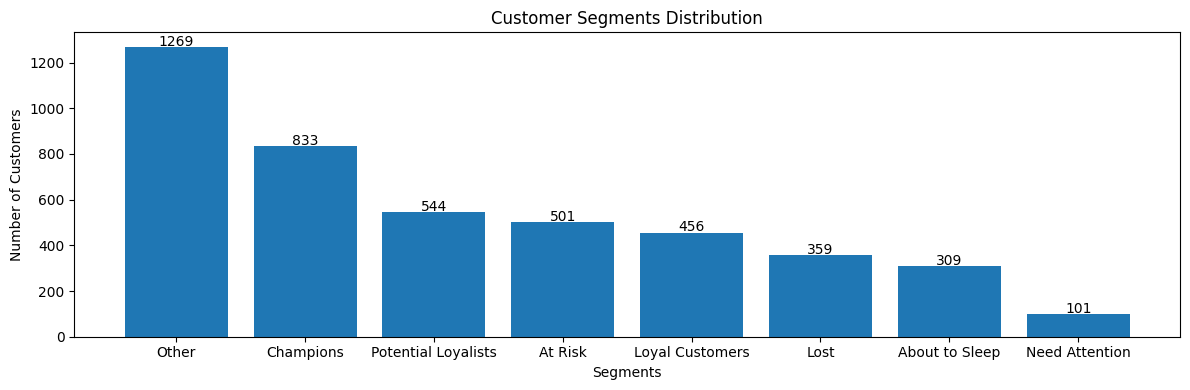

In [414]:
segment_counts = RFM['Segment'].value_counts()
plt.figure(figsize=(12,4))
bars = plt.bar(segment_counts.index, segment_counts.values)
for bar in bars:
    y = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, y + 5, y, ha='center')
plt.title("Customer Segments Distribution")
plt.xlabel("Segments")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()


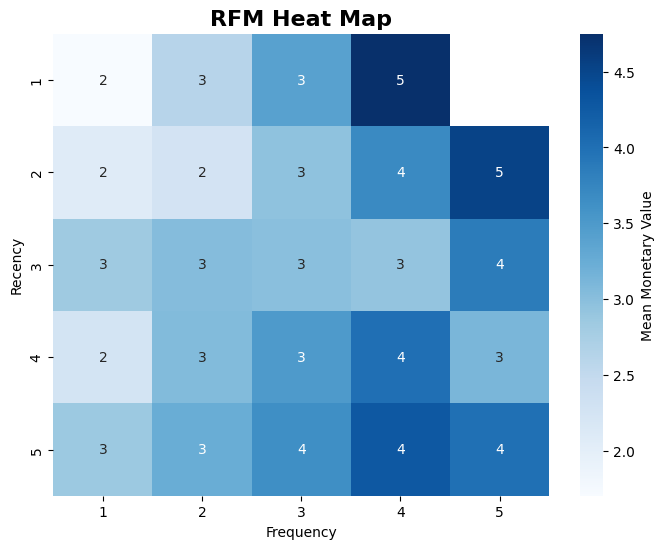

In [415]:
# Darker spots is better (Higher Monetary Value)
# As you go right is better (Higher Frequency)
# As you go down is better (Higher Recency)

heatmap_data = RFM.groupby(['R','F'])['M'].mean().reset_index()

heatmap_matrix = heatmap_data.pivot(index='R', columns='F', values='M')

plt.figure(figsize=(8,6))
sns.heatmap(heatmap_matrix, annot=True, fmt=".0f", cmap="Blues", cbar_kws={'label': 'Mean Monetary Value'})
plt.title("RFM Heat Map", fontsize=16, fontweight="bold")
plt.ylabel("Recency")
plt.xlabel("Frequency")
plt.show()
